## Setup

In [6]:
# Import Dependencies.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import requests
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [7]:
# Fetch the data from the API.
listings_json = requests.get("http://127.0.0.1:5000/api/v1.0/listings").json()

# Examine the data.
print(json.dumps(listings_json[0], indent=4, sort_keys=True))

{
    "address": "17452 NE GLISAN ST #7, Portland OR 97230",
    "bathrooms": 2.0,
    "bedrooms": 2,
    "built": 1988,
    "city": "Portland",
    "county": "Multnomah",
    "elementary_school": "Hartley",
    "high_school": "Reynolds",
    "home_type": "Manufactured - Double Wide Manufact",
    "lot_size": null,
    "middle_school": "Reynolds",
    "neighborhood": "unknown",
    "price": 72000,
    "square_feet": 1152,
    "zipcode": 97230
}


In [8]:
# Create a dataframe to use for our model.
data_df = pd.DataFrame(listings_json)

data_df.head()

,address,bathrooms,bedrooms,built,city,county,elementary_school,high_school,home_type,lot_size,middle_school,neighborhood,price,square_feet,zipcode
0,"17452 NE GLISAN ST #7, Portland OR 97230",2.0,2,1988,Portland,Multnomah,Hartley,Reynolds,Manufactured - Double Wide Manufact,NaN,Reynolds,unknown,72000,1152,97230
1,"16000 SE POWELL BLVD 75, Portland OR 97236",2.0,3,1990,Portland,Multnomah,Powell Butte,Centennial,Manufactured - Double Wide Manufact,NaN,Centennial,unknown,79950,1404,97236
2,"12846 SE RAMONA ST 6, Portland OR 97236",2.0,3,1997,Portland,Multnomah,Gilbert Hts,David Douglas,Manufactured - Double Wide Manufact,NaN,Alice Ott,unknown,93900,1297,97236
3,"7720 S Macadam AVE 7, Portland OR 97219",3.0,3,1988,Portland,Multnomah,Other,Other,Floating Home - Contemporary,NaN,Other,unknown,125000,2432,97219
4,"19609 NE Marine DR E-4, Portland OR 97230",1.0,1,1960,Portland,Multnomah,Salish Pond,Reynolds,Floating Home - Cabin,NaN,Reynolds,unknown,129500,735,97230


## Linear Models Using All Rows

In [16]:
# Assign X (input) and y (target).

X = data_df.loc[:, ["bedrooms", "bathrooms", "square_feet", "built"]]
y = data_df.loc[:,"price"].values.reshape(-1, 1)


In [17]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [19]:
# Transform the training and testing data using the X_scaler and y_scaler models.

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [20]:
# Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

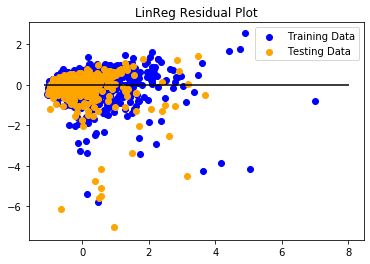

In [21]:
# Make predictions using a fitted model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("LinReg Residual Plot")
plt.show()

In [22]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2.

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.760834392213053, R2: 0.48309694392083163


In [23]:
# LASSO model, we'll use gridsearch later to try out different alpha values later.

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

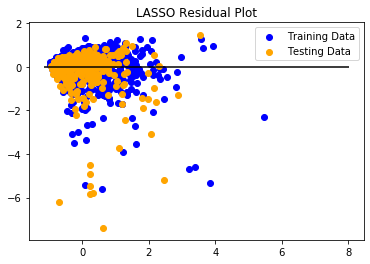

In [30]:
# Make predictions using a fitted lasso model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(lasso.predict(X_train_scaled), lasso.predict(X_train_scaled) - list(np.ravel(y_train_scaled)), c="blue", label="Training Data")
plt.scatter(lasso.predict(X_test_scaled), lasso.predict(X_test_scaled) - list(np.ravel(y_test_scaled)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("LASSO Residual Plot")
plt.show()

In [31]:
# Used X_test_scaled, y_test_scaled, and lasso.predict(X_test_scaled) to calculate MSE and R2.

lasso_predictions = lasso.predict(X_test_scaled)
lasso_MSE = mean_squared_error(y_test_scaled, lasso_predictions)
lasso_r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {lasso_MSE}, R2: {lasso_r2}")

MSE: 0.8731141823474815, R2: 0.4068152100107777


In [32]:
# Ridge model, we'll use gridsearch later to try out different alpha values later.

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

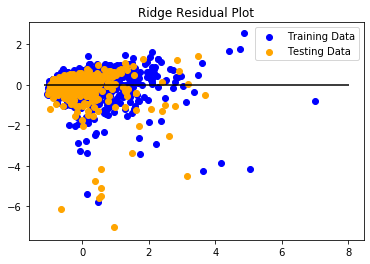

In [33]:
# Make predictions using a fitted ridge model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(ridge.predict(X_train_scaled), ridge.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(ridge.predict(X_test_scaled), ridge.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Ridge Residual Plot")
plt.show()

In [34]:
# Used X_test_scaled, y_test_scaled, and ridge.predict(X_test_scaled) to calculate MSE and R2.

ridge_predictions = ridge.predict(X_test_scaled)
ridge_MSE = mean_squared_error(y_test_scaled, ridge_predictions)
ridge_r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {ridge_MSE}, R2: {ridge_r2}")

MSE: 0.7608596338618626, R2: 0.4830797950044002


In [35]:
# ElasticNet model, we'll use gridsearch later to try out different alpha values later.

elast = ElasticNet(alpha=0.1)
elast.fit(X_train_scaled, y_train_scaled)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

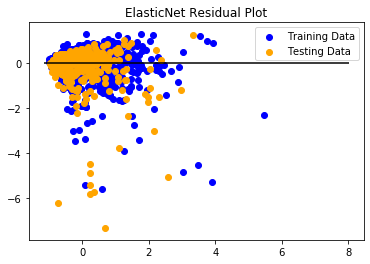

In [37]:
# Make predictions using a fitted elasticnet model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(elast.predict(X_train_scaled), elast.predict(X_train_scaled) - list(np.ravel(y_train_scaled)), c="blue", label="Training Data")
plt.scatter(elast.predict(X_test_scaled), elast.predict(X_test_scaled) - list(np.ravel(y_test_scaled)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("ElasticNet Residual Plot")
plt.show()

In [40]:
# Used X_test_scaled, y_test_scaled, and elast.predict(X_test_scaled) to calculate MSE and R2.

elast_predictions = elast.predict(X_test_scaled)
elast_MSE = mean_squared_error(y_test_scaled, elast_predictions)
elast_r2 = elast.score(X_test_scaled, y_test_scaled)

print(f"MSE: {elast_MSE}, R2: {elast_r2}")

MSE: 0.8584409058578742, R2: 0.4167840830504296


## Linear Models Using Only Rows With Lot Size

In [43]:
# Assign X (input) and y (target).

lot_data_df = data_df.dropna()
X = lot_data_df.loc[:, ["bedrooms", "bathrooms", "square_feet", "lot_size", "built"]]
y = lot_data_df.loc[:,"price"].values.reshape(-1, 1)

In [44]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [46]:
# Transform the training and testing data using the X_scaler and y_scaler models.

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [47]:
# Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

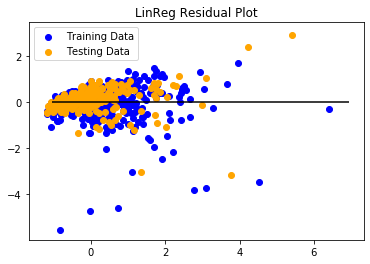

In [48]:
# Make predictions using a fitted model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("LinReg Residual Plot")
plt.show()

In [49]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2.

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2771191863116997, R2: 0.6678697689762081


In [50]:
# LASSO model, we'll use gridsearch later to try out different alpha values later.

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

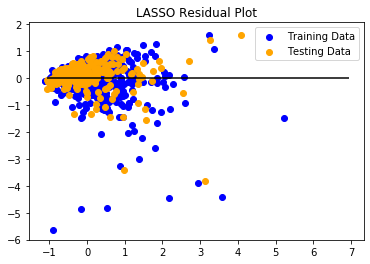

In [51]:
# Make predictions using a fitted lasso model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(lasso.predict(X_train_scaled), lasso.predict(X_train_scaled) - list(np.ravel(y_train_scaled)), c="blue", label="Training Data")
plt.scatter(lasso.predict(X_test_scaled), lasso.predict(X_test_scaled) - list(np.ravel(y_test_scaled)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("LASSO Residual Plot")
plt.show()

In [52]:
# Used X_test_scaled, y_test_scaled, and lasso.predict(X_test_scaled) to calculate MSE and R2.

lasso_predictions = lasso.predict(X_test_scaled)
lasso_MSE = mean_squared_error(y_test_scaled, lasso_predictions)
lasso_r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {lasso_MSE}, R2: {lasso_r2}")

MSE: 0.2652837412728159, R2: 0.6820546731228753


In [53]:
# Ridge model, we'll use gridsearch later to try out different alpha values later.

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

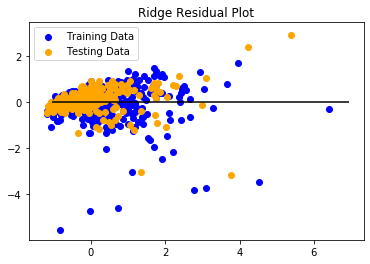

In [54]:
# Make predictions using a fitted ridge model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(ridge.predict(X_train_scaled), ridge.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(ridge.predict(X_test_scaled), ridge.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Ridge Residual Plot")
plt.show()

In [55]:
# Used X_test_scaled, y_test_scaled, and ridge.predict(X_test_scaled) to calculate MSE and R2.

ridge_predictions = ridge.predict(X_test_scaled)
ridge_MSE = mean_squared_error(y_test_scaled, ridge_predictions)
ridge_r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {ridge_MSE}, R2: {ridge_r2}")

MSE: 0.27707006562497044, R2: 0.6679286406308509


In [56]:
# ElasticNet model, we'll use gridsearch later to try out different alpha values later.

elast = ElasticNet(alpha=0.1)
elast.fit(X_train_scaled, y_train_scaled)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

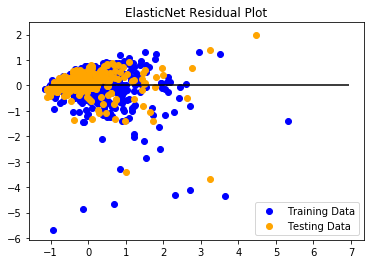

In [57]:
# Make predictions using a fitted elasticnet model.
# Plot the difference between the model predicted values and actual y values, versus the model predicted values.

plt.scatter(elast.predict(X_train_scaled), elast.predict(X_train_scaled) - list(np.ravel(y_train_scaled)), c="blue", label="Training Data")
plt.scatter(elast.predict(X_test_scaled), elast.predict(X_test_scaled) - list(np.ravel(y_test_scaled)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("ElasticNet Residual Plot")
plt.show()

In [58]:
# Used X_test_scaled, y_test_scaled, and elast.predict(X_test_scaled) to calculate MSE and R2.

elast_predictions = elast.predict(X_test_scaled)
elast_MSE = mean_squared_error(y_test_scaled, elast_predictions)
elast_r2 = elast.score(X_test_scaled, y_test_scaled)

print(f"MSE: {elast_MSE}, R2: {elast_r2}")

MSE: 0.2597308241832265, R2: 0.6887099020890387
